In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
###Determining the tone of the text of reviews of films from IMDb (Internet Movie Database)
max_words=10000
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=max_words)

In [4]:
###Training data preparation
maxlen = 200
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen, padding='post')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen, padding='post')

In [5]:
###Create neural network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_words, 8, input_length=maxlen))
model.add(tf.keras.layers.GRU(32))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [6]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [7]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=20,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/20
176/176 [==============================] - 14s 79ms/step - loss: 0.6864 - accuracy: 0.5311 - val_loss: 0.6648 - val_accuracy: 0.5748
Epoch 2/20
176/176 [==============================] - 14s 77ms/step - loss: 0.6233 - accuracy: 0.6280 - val_loss: 0.6416 - val_accuracy: 0.5992
Epoch 3/20
176/176 [==============================] - 13s 76ms/step - loss: 0.5963 - accuracy: 0.6431 - val_loss: 0.6062 - val_accuracy: 0.6220
Epoch 4/20
176/176 [==============================] - 13s 75ms/step - loss: 0.4152 - accuracy: 0.8037 - val_loss: 0.3695 - val_accuracy: 0.8492
Epoch 5/20
176/176 [==============================] - 13s 76ms/step - loss: 0.2701 - accuracy: 0.8976 - val_loss: 0.3456 - val_accuracy: 0.8704
Epoch 6/20
176/176 [==============================] - 13s 75ms/step - loss: 0.2094 - accuracy: 0.9273 - val_loss: 0.3345 - val_accuracy: 0.8700
Epoch 7/20
176/176 [==============================] - 13s 76ms/step - loss: 0.1762 - accuracy: 0.9408 - val_loss: 0.3472 - val_accuracy:

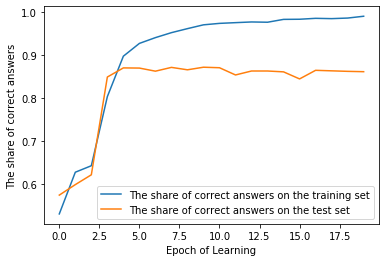

In [8]:
plt.plot(history.history['accuracy'], 
         label='The share of correct answers on the training set')
plt.plot(history.history['val_accuracy'], 
         label='The share of correct answers on the test set')
plt.xlabel('Epoch of Learning')
plt.ylabel('The share of correct answers')
plt.legend()
plt.show()

In [9]:
scores = model.evaluate(X_test, y_test, verbose=1)

782/782 [==============================] - 8s 10ms/step - loss: 0.5885 - accuracy: 0.8481
